# **Import the Libraries**

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [25]:
data = pd.read_csv('mushroom.csv')
display(data)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


## **Dataset Overview**

The dataset consists of mushroom samples described by categorical attributes such as:

* Cap shape, color, and surface
* Gill and stem characteristics
* Habitat and season

The target variable indicates whether a mushroom is:

* Edible

* Poisonous

# **Exploratory Data Analysis**

## **Type of The Features**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Most features are categorical (object).

## **Target Distribution**

Understanding the class distribution is important to ensure that evaluation metrics are interpreted correctly and that the model does not trivially optimize for the majority class.

In [27]:
data['class'].value_counts()

class
p    33888
e    27181
Name: count, dtype: int64

The dataset shows a relatively balanced distribution between `edible (e)` and `poisonous (p)` mushrooms.

## **Missing Value Checking**

In [28]:
data.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

**The features `gill-spacing`, `stem-root`, `stem-surface`, `veil-type`, `veil-color`, and `spore-print-color` have many missing values.**

Missing values proportion:
| Feature | Missing Values |
| ------- | -------------- |
| `gill-spacing` | 41% |
| `stem-root` | 84% |
| `stem-surface` | 62% |
| `veil-type` | 95% |
| `veil-color` | 88% |
| `spore-print-color` | 90% |

These features need to be removed to clean the dataset.

## **Descriptive Statistics**

In [29]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


**Descriptive Statistics Interpretation**

The numerical features show distinct distributional characteristics that are relevant for modeling.

**Cap Diameter**
- The mean cap diameter (6.73) is higher than the median (5.86), indicating a right-skewed distribution.
- Most mushrooms have relatively small to medium caps, with a few extreme large-cap outliers.

**Stem Height**
- Stem height shows a more compact distribution compared to cap diameter.
- The presence of zero values may represent very young mushrooms or recording artifacts and is retained for modeling.

**Stem Width**
- Stem width exhibits the largest variability among numerical features.
- A small number of mushrooms have exceptionally thick stems, suggesting potential discriminative power.

**Modeling Implication**
- The numerical features are non-normally distributed and contain outliers.
- Tree-based models such as XGBoost are well-suited for this data, as they are robust to outliers and do not rely on distributional assumptions.


# **Data Preprocessing**

## **Splitting**

Split the data to X and y before imputation and modelling to prevent information leakage from the test set.

In [30]:
X = data.drop(['class'], axis = 1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Dropping Missing Values**

The features that have many missing value can be dropped to clean the dataset.

In [31]:
drop_feature = [
    'gill-spacing',
    'stem-root',
    'stem-surface',
    'veil-type',
    'veil-color',
    'spore-print-color'
]

X_train = X_train.drop(columns=drop_feature)
X_test = X_test.drop(columns=drop_feature)

In [32]:
X_train.isna().sum()

cap-diameter                0
cap-shape                   0
cap-surface             11314
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7917
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                1967
habitat                     0
season                      0
dtype: int64

There are still some missing values in several features. These features will be imputed.

In [33]:
col_na = ['cap-surface', 'gill-attachment', 'ring-type']

for col in col_na:
    print(f'Value counts in {col}')
    print(X_train[col].value_counts())

Value counts in cap-surface
cap-surface
t    6589
s    6054
y    5087
h    4000
g    3780
d    3550
e    2053
k    1815
i    1768
w    1706
l    1139
Name: count, dtype: int64
Value counts in gill-attachment
gill-attachment
a    10160
d     8153
x     5946
p     4803
e     4531
s     4502
f     2843
Name: count, dtype: int64
Value counts in ring-type
ring-type
f    38692
e     1977
z     1685
l     1144
r     1117
p     1004
g      989
m      280
Name: count, dtype: int64


## **Imputation**

Perform imputation on the features in `col_na`. In this case, the Simple Imputer will be used.

In [34]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train[col_na] = imputer.fit_transform(X_train[col_na])
X_test[col_na] = imputer.transform(X_test[col_na])

Missing values are treated as a separate category rather than being imputed with the mode.
This allows the model to explicitly learn whether missingness itself carries predictive information,
which is particularly suitable for tree-based models such as XGBoost.

## **Encoding**

### Encoding Strategy

The target variable is label-encoded to enable binary classification.
A mapping between original class labels and encoded values is explicitly retained
to ensure correct interpretation of evaluation metrics, particularly recall for the poisonous class.

Categorical features are encoded using one-hot encoding via a ColumnTransformer,
while numerical features are passed through without scaling.
This approach preserves interpretability and is well-suited for tree-based models such as XGBoost.

**Encoding the target feature (`class`)** to convert the labels ‘e’ and ‘p’ to 0 and 1.

In [35]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print("Target Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Target Class Mapping: {'e': np.int64(0), 'p': np.int64(1)}


**Encoding existing features train and test.**

In [36]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = ['cap-diameter', 'stem-height', 'stem-width']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],verbose_feature_names_out=False
)

X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

X_train_final_df = pd.DataFrame(X_train_final, columns=feature_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=feature_names)

display(X_train_final_df.head())

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,2.47,3.53,10.76,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.64,6.43,7.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.69,6.10,8.33,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.91,7.42,9.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,16.40,6.79,22.42,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The resulting feature matrix consists of a combination of numerical attributes and
one-hot encoded categorical features, producing a high-dimensional but fully numerical
representation suitable for gradient-boosted decision trees.

# **Modelling**

In this study, Extreme Gradient Boosting (XGBoost) is used as the primary classification model.
XGBoost is a tree-based ensemble method that performs well on structured tabular data,
handles high-dimensional one-hot encoded features effectively,
and is robust to feature scaling issues.


In [37]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_final_df, y_train_encoded)
y_pred = xgb_model.predict(X_test_final_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:04:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


The model is trained on the preprocessed training data and evaluated on a held-out test set.
Predictions are generated to assess the model's ability to correctly identify poisonous mushrooms,
which is the most critical objective of this classification task.


# **Evaluation**

## **Accuracy Score**

In [38]:
acc = accuracy_score(y_test_encoded, y_pred)
print(f"Model accuracy: {acc:.4f}")

Model accuracy: 0.9788


## **Classification Report**

In [39]:
print("Classification Report:")
target_names = le.classes_
print(classification_report(y_test_encoded, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

           e       0.98      0.97      0.98      5374
           p       0.98      0.98      0.98      6840

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214



Model performance is evaluated with an emphasis on recall for the poisonous class.
In this context, false negatives (predicting a poisonous mushroom as edible)
represent the most dangerous type of error.

Therefore, recall is prioritized over overall accuracy score to minimize the risk
of misclassifying poisonous mushrooms.

## **Confusion Matrix**

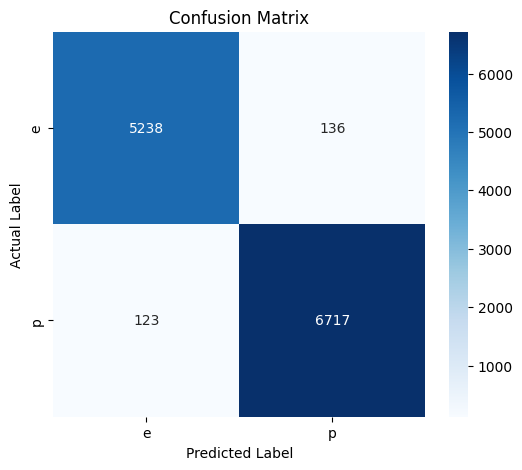

In [40]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_encoded, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix Interpretation

The confusion matrix shows that the model performs very well in distinguishing
between edible and poisonous mushrooms.

Out of all poisonous mushrooms, 6,717 are correctly identified, while only 123
are misclassified as edible. This results in a very high recall for the poisonous
class, which is critical in a food safety context where false negatives pose
the greatest risk.

Although 136 edible mushrooms are incorrectly classified as poisonous,
this type of error is considered acceptable compared to the potential danger
of misclassifying poisonous mushrooms as safe.

Overall, the model demonstrates strong performance with a clear emphasis on
minimizing high-risk classification errors.

## **Most Important Feature**

Feature importance reflects how frequently and effectively a feature is used by the model, not the direction or causality of its effect.

/tmp/ipykernel_55/830589395.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features, y=top_10_features.index, palette='viridis')


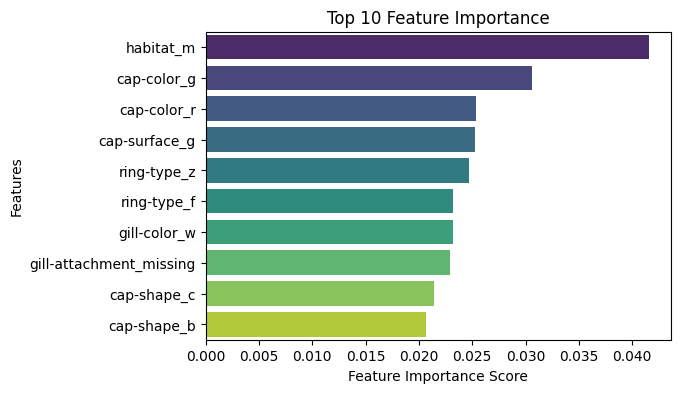

In [41]:
feature_imp = pd.Series(xgb_model.feature_importances_, index=X_train_final_df.columns).sort_values(ascending=False)

top_10_features = feature_imp.head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_10_features, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

The plot shows the top 10 most important features as learned by the XGBoost Classifier.

### Key Observations

- **Habitat-related features**, particularly `habitat_m` (meadows habitat), dominate the model’s decision process, suggesting strong ecological patterns between poisonous and non-poisonous mushrooms, especially meadows habitat.
- **Cap characteristics** (color, surface, and shape) consistently appear among the top features, highlighting the importance of cap's visual and morphological attributes.
- **Ring type and gill-related features** provide additional discriminative power, especially for distinguishing structurally similar mushrooms.
- Interestingly, **missing values in gill attachment** emerge as an informative feature, indicating that missingness itself may carry predictive signal rather than being purely noise.

Overall, the feature importance analysis confirms that the model relies on a diverse set of ecological, morphological, and structural features rather than a single dominant attribute.


## **Threshold Tuning**

Machine learning classification generally produces probabilities rather than final decisions. A common threshold of 0.5 implicitly assumes that all classification errors have the same cost, which is often unrealistic in practical applications.

In mushroom toxicity classification, the cost of a false negative error (classifying a poisonous mushroom as safe for consumption) is much higher than that of a false positive error. As a result, relying on default thresholds or aggregate metrics alone can lead to unsafe decisions.

Therefore, threshold adjustment is performed to explicitly adjust decision boundaries and allow the model to prioritize safety by consciously controlling the trade-off between precision and recall in a risk-aware manner.

In [42]:
y_proba = xgb_model.predict_proba(X_test_final_df)[:, 1]

In [43]:
thresholds = np.arange(0.1, 0.91, 0.05)

results = []

for t in thresholds:
    y_pred_tuned = (y_proba >= t).astype(int)
    
    precision = precision_score(y_test_encoded, y_pred_tuned)
    recall = recall_score(y_test_encoded, y_pred_tuned)
    f1 = f1_score(y_test_encoded, y_pred_tuned)
    
    results.append({
        'threshold': t,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

results_df = pd.DataFrame(results)
display(results_df)

,threshold,precision,recall,f1_score
0,0.10,0.694213,0.999708,0.819413
1,0.15,0.782917,0.999708,0.878130
2,0.20,0.849720,0.999415,0.918509
3,0.25,0.889149,0.999123,0.940933
4,0.30,0.916924,0.997222,0.955389
5,0.35,0.944213,0.994737,0.968817
6,0.40,0.958316,0.991520,0.974635
7,0.45,0.967867,0.986404,0.977047
8,0.50,0.980155,0.982018,0.981085
9,0.55,0.987252,0.973684,0.980421


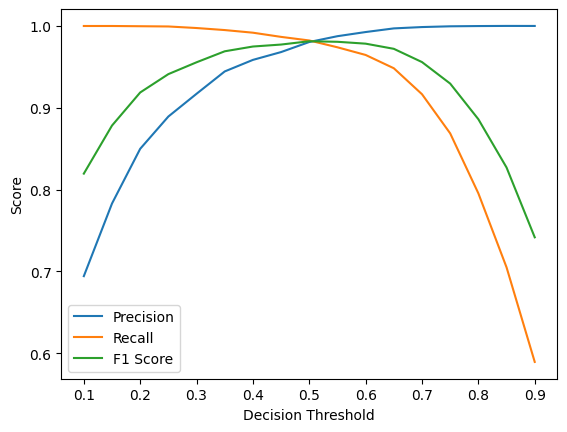

In [44]:
plt.figure()
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.plot(results_df['threshold'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

### Threshold Selection

The threshold analysis reveals a clear trade-off between precision and recall.
As the threshold decreases, recall for the poisonous class increases at the cost
of reduced precision.

Given the high-risk nature of misclassifying poisonous mushrooms as edible,
a threshold in the range of 0.30–0.40 provides an optimal balance.
In this range, recall exceeds 99%, significantly reducing false negatives,
while precision remains sufficiently high to limit unnecessary false alarms.

While F1-score provides a useful summary of model performance,
it should not be treated as the sole criterion for model selection.
In high-risk classification problems, the cost of different error types
must be carefully considered.

For poisonous mushroom classification, minimizing false negatives
is significantly more important than maximizing overall F1-score.
Therefore, evaluation and threshold selection are guided by recall
and risk-aware decision making rather than metric optimization alone.

Based on this analysis, a decision threshold of 0.30 is selected to prioritize
safety by minimizing the likelihood of poisonous mushrooms being classified as edible.

              precision    recall  f1-score   support

           e       1.00      0.89      0.94      5374
           p       0.92      1.00      0.96      6840

    accuracy                           0.95     12214
   macro avg       0.96      0.94      0.95     12214
weighted avg       0.95      0.95      0.95     12214



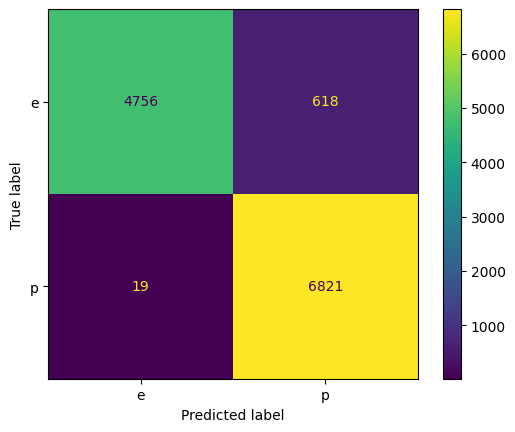

In [45]:
best_threshold = 0.30
y_pred_tuned = (y_proba >= best_threshold).astype(int)

print(classification_report(y_test_encoded, y_pred_tuned, target_names=le.classes_))

cm2 = confusion_matrix(y_test_encoded, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=le.classes_)
disp.plot()

### Impact of Threshold Tuning

After lowering the decision threshold to 0.30, the model significantly reduces
the number of false negatives for the poisonous class, from 123 to only 19 cases.
This represents an approximate 85% reduction in high-risk misclassifications.

While the number of false positives increases, this trade-off is acceptable
given the problem context, as misclassifying an edible mushroom as poisonous
poses far less risk than the reverse.

Overall, threshold tuning successfully shifts the model’s behavior toward
a safety-first decision strategy.

# **Conclusion**

This project demonstrates the application of a reliable machine learning pipeline for mushroom toxicity classification using the XGBoost classifier. Through systematic exploratory data analysis, careful preprocessing, and appropriate handling of categorical and numerical features, this model achieves strong predictive performance while remaining stable and reproducible.

The model relies on a combination of diverse ecological (habitat), morphological (color, shape, and cap surface), and structural (ring type and lamella-related features) characteristics. This indicates that predictions are not driven by a single dominant feature, but rather by meaningful patterns across features. 

This project emphasizes decision-oriented evaluation rather than relying on aggregate metrics such as accuracy scores or F1 scores. By adjusting the threshold, the classification decision boundary is explicitly adjusted to account for the risk of false negative (poisonous mushrooms classified as safe), which are far more dangerous than false positive.  

The results show that:  

* A model with strong overall metrics may still be unsuitable if the decision threshold is not aligned with real-world risks.
* Threshold adjustment provides a practical and interpretable mechanism for balancing precision and recall according to specific problem priorities.
* Model evaluation should ultimately be guided by the consequences of errors, not just numerical performance scores.

Overall, this notebook presents a comprehensive and realistic machine learning workflow by combining solid predictive modeling and risk-aware decision making. The approach taken reflects considerations often encountered in real-world implementation scenarios. Model output should support safe and responsible decisions, not just purely optimized metrics.